In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("hotel_bookings.csv")

In [3]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015


In [4]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [5]:
data['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [6]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data=data.drop(['agent','company'],axis=1)

In [8]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [9]:
data['country'].value_counts().index[0]

'PRT'

In [10]:
data['country'].fillna(data['country'].value_counts().index[0],inplace=True)

In [11]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
data.fillna(0,inplace=True)

In [13]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
filter1=((data['children']==0)&(data['babies']==0)&(data['adults']==0))

In [15]:
data[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [16]:
datar=data[~filter1]

In [17]:
datar.shape

(119210, 30)

In [18]:
data[filter1].shape

(180, 30)

In [19]:
datar[datar['is_canceled']==0]['country'].value_counts()

PRT    21398
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 165, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

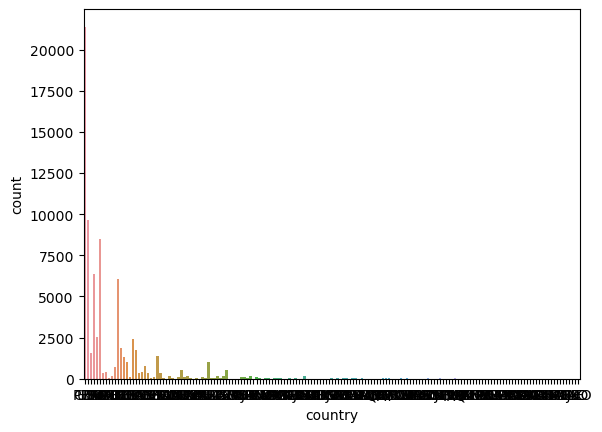

In [20]:
sns.countplot(x=datar[datar['is_canceled']==0]['country'],data=datar)

In [21]:
len(datar['is_canceled']==0)

119210

In [22]:
datar[datar['is_canceled']==0]['country'].value_counts()/119210

PRT    0.179498
GBR    0.081101
FRA    0.071034
ESP    0.053544
DEU    0.050893
         ...   
BHR    0.000008
DJI    0.000008
MLI    0.000008
NPL    0.000008
FRO    0.000008
Name: country, Length: 165, dtype: float64

In [23]:
country_wise_info=datar[datar['is_canceled']==0]['country'].value_counts().reset_index()

In [24]:
country_wise_info.head(5)

,index,country
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


In [25]:
country_wise_info.columns=['country','no.of.guests']

In [26]:
country_wise_info.head(10)

,country,no.of.guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
5,IRL,2542
6,ITA,2428
7,BEL,1868
8,NLD,1716
9,USA,1592


(0.0, 10000.0)

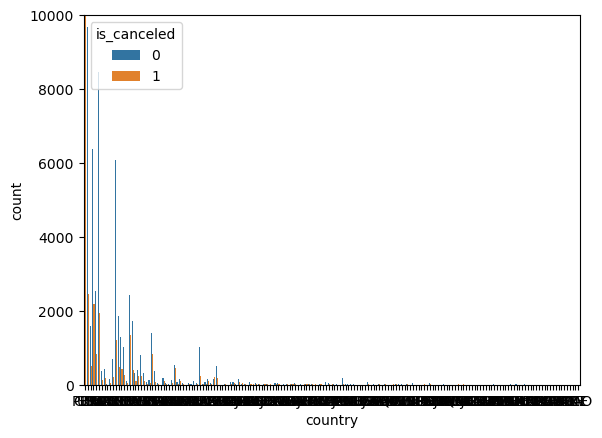

In [27]:
gfgf=sns.countplot(x=datar['country'],hue=datar['is_canceled'],data=datar)
gfgf.set_ylim(0,10000)

How much guests pay for one night stay?

In [28]:
datar.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,4/22/2015


(0.0, 1000.0)

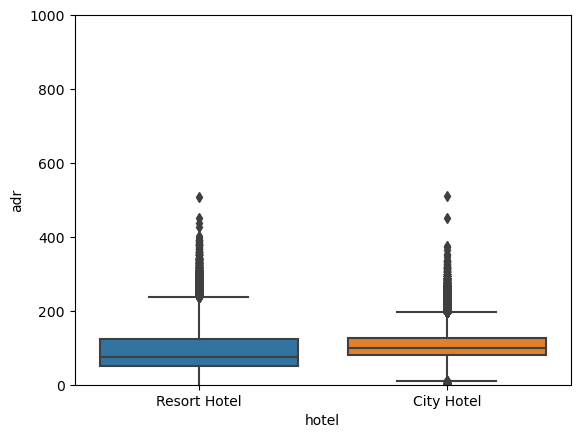

In [29]:
gfg=sns.boxplot(x=datar['hotel'],y=datar['adr'],data=datar)
gfg.set_ylim(0,1000)

(0.0, 1000.0)

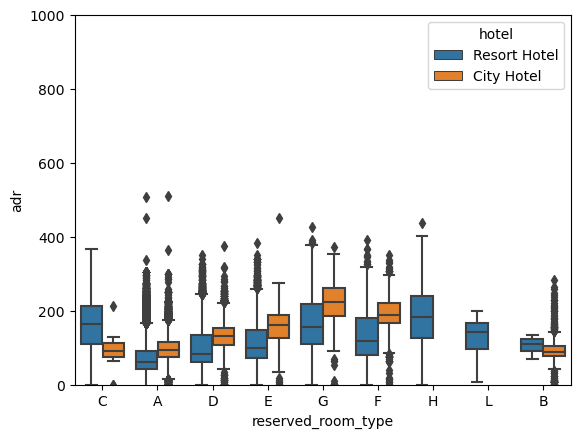

In [30]:
gfg=sns.boxplot(x=datar['reserved_room_type'],y=datar['adr'],hue=datar['hotel'],data=datar)
gfg.set_ylim(0,1000)

Most busy month???

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

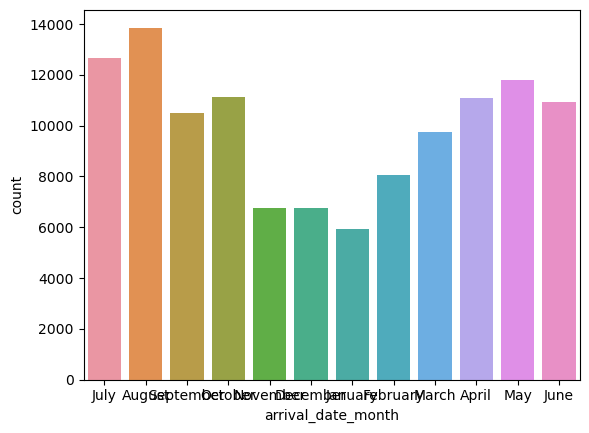

In [31]:
sns.countplot(x=datar['arrival_date_month'])

month vs avr

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

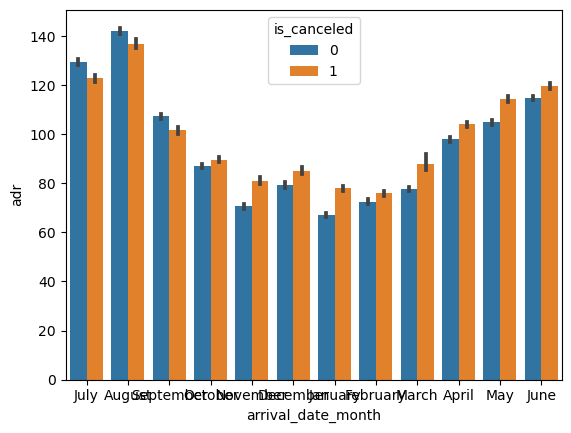

In [32]:
sns.barplot(x='arrival_date_month',y='adr',hue='is_canceled',data=datar)

In [33]:
def weekend(row):
    if(row['stays_in_weekend_nights']>0):
        return 1
    else:
        return 0

In [34]:
datar['weekend_stay']=datar.apply(weekend,axis=1)

C:\Users\Hi\AppData\Local\Temp\ipykernel_1104\2293526825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datar['weekend_stay']=datar.apply(weekend,axis=1)


In [35]:
datar['weekend_stay'].value_counts()

1    67315
0    51895
Name: weekend_stay, dtype: int64

variation of prices with weekend

(0.0, 1000.0)

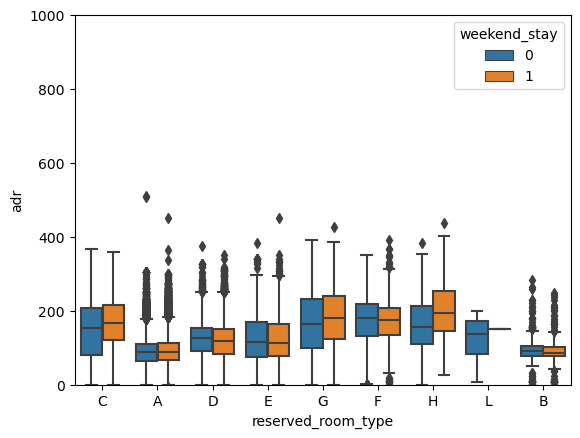

In [36]:
gfg4=sns.boxplot(x=datar['reserved_room_type'],y=datar['adr'],hue=datar['weekend_stay'],data=datar)
gfg4.set_ylim(0,1000)

(0.0, 1000.0)

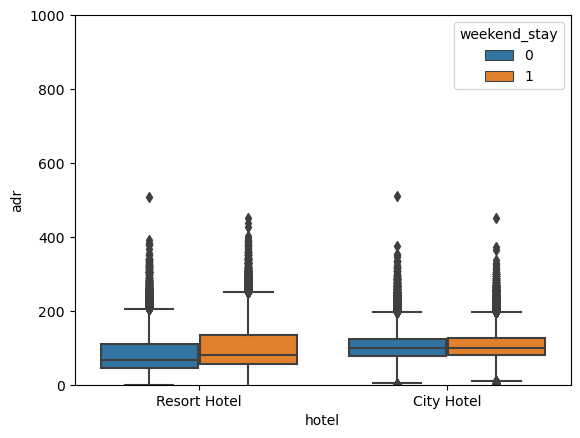

In [37]:
gfg5=sns.boxplot(x='hotel',y='adr',hue='weekend_stay',data=datar)
gfg5.set_ylim(0,1000)

In [38]:
def family(row):
    if(row['adults']>0)&(row['children']>0 or row['babies']>0):
        return 1
    else:
        return 0

In [39]:
datar['is_family']=datar.apply(family,axis=1)

C:\Users\Hi\AppData\Local\Temp\ipykernel_1104\330312572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datar['is_family']=datar.apply(family,axis=1)


In [40]:
datar['is_family'].value_counts()

0    110101
1      9109
Name: is_family, dtype: int64

In [41]:
datar.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_stay,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,0,0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,0,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,107.0,0,0,Check-Out,7/3/2015,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,103.0,0,1,Check-Out,7/3/2015,0,0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,0,Transient,82.0,0,1,Canceled,5/6/2015,0,0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,0,Transient,105.5,0,0,Canceled,4/22/2015,0,0


In [42]:
datar.drop('reservation_status',axis=1,inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_1104\3851137332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datar.drop('reservation_status',axis=1,inplace=True)


In [43]:
datar.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,weekend_stay,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,7/1/2015,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,7/1/2015,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,7/2/2015,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,7/2/2015,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,7/3/2015,0,0


family vs non family lead time

<AxesSubplot:xlabel='is_family', ylabel='lead_time'>

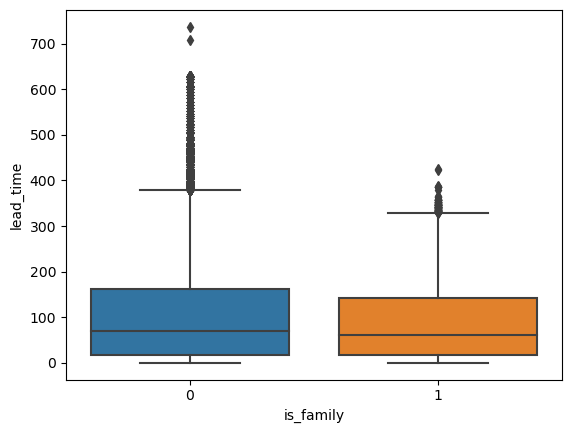

In [44]:
sns.boxplot(x='is_family',y='lead_time',data=datar)

<AxesSubplot:xlabel='is_family', ylabel='lead_time'>

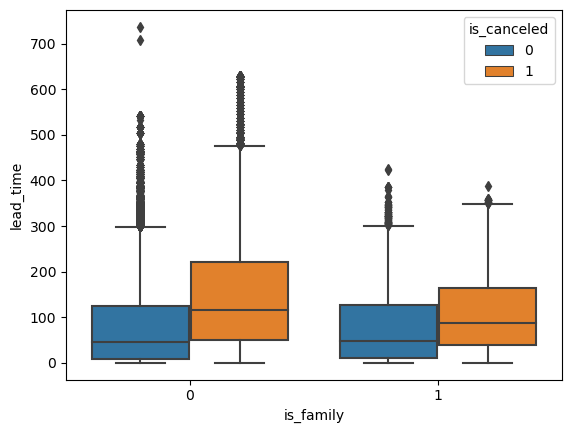

In [45]:
sns.boxplot(x='is_family',y='lead_time',hue='is_canceled',data=datar)

do families book weekends??

<AxesSubplot:xlabel='is_family', ylabel='lead_time'>

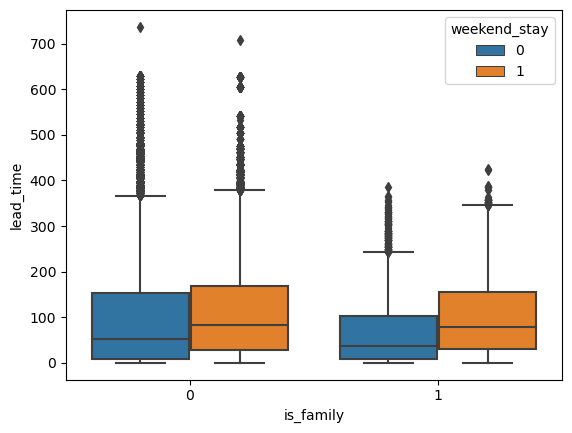

In [46]:
sns.boxplot(x='is_family',y='lead_time',data=datar,hue='weekend_stay')

In [47]:
datar['customer_type'].value_counts()

Transient          89476
Transient-Party    25088
Contract            4072
Group                574
Name: customer_type, dtype: int64

does adr vary with customer type ??

(0.0, 1000.0)

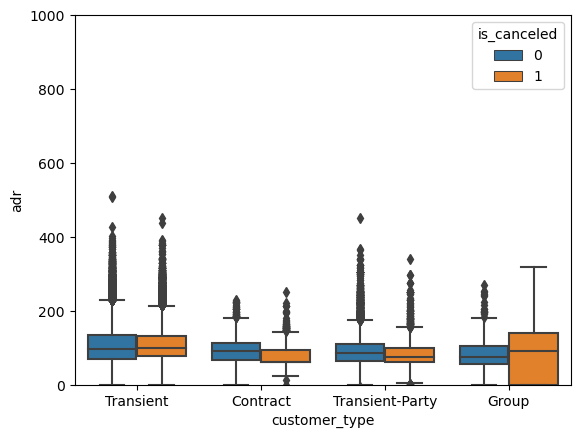

In [48]:
gfg6=sns.boxplot(x='customer_type',y='adr',hue='is_canceled',data=datar)
gfg6.set_ylim(0,1000)

<AxesSubplot:xlabel='customer_type', ylabel='lead_time'>

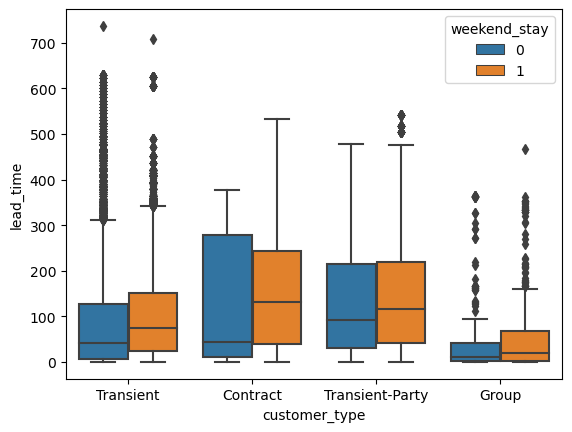

In [49]:
sns.boxplot(x='customer_type',y='lead_time',data=datar,hue='weekend_stay')

In [50]:
datar.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,weekend_stay,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,7/1/2015,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,7/1/2015,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,7/2/2015,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,7/2/2015,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,7/3/2015,0,0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,7/3/2015,0,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,107.0,0,0,7/3/2015,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,103.0,0,1,7/3/2015,0,0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,5/6/2015,0,0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,4/22/2015,0,0


In [51]:
datar['arrival_date_year'].value_counts()

2016    56623
2017    40620
2015    21967
Name: arrival_date_year, dtype: int64

prices variation with year

(0.0, 1000.0)

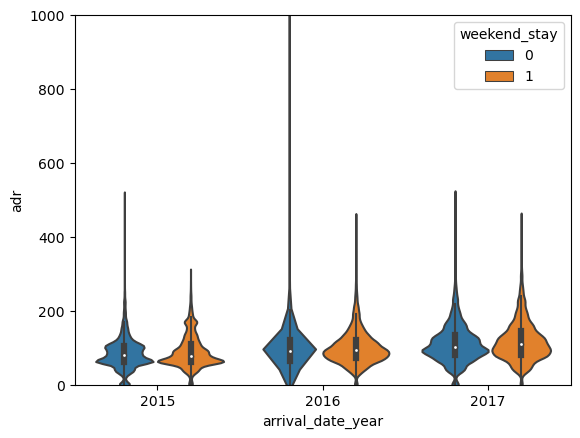

In [52]:
gfg7=sns.violinplot(x='arrival_date_year',y='adr',hue='weekend_stay',data=datar)
gfg7.set_ylim(0,1000)

(0.0, 1000.0)

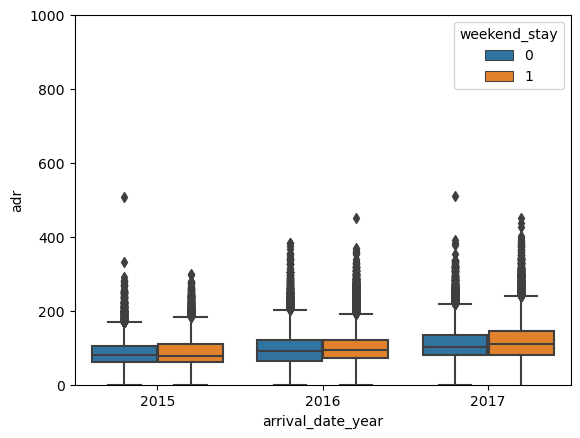

In [53]:
gfg7=sns.boxplot(x='arrival_date_year',y='adr',hue='weekend_stay',data=datar)
gfg7.set_ylim(0,1000)

In [54]:
datar['deposit_type'].value_counts()

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

do customers deposit and cancel

<AxesSubplot:xlabel='deposit_type', ylabel='is_canceled'>

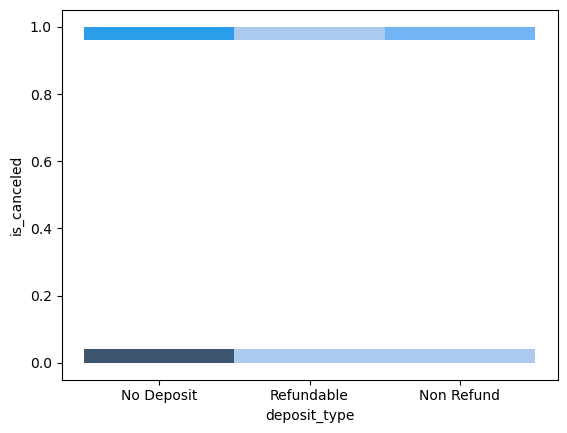

In [55]:
sns.histplot(x='deposit_type',y='is_canceled',data=datar)

In [56]:
datar.replace({"deposit_type":{"No Deposit":1,"Refundable":2,"Non Refund":3}},inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_1104\2222505999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datar.replace({"deposit_type":{"No Deposit":1,"Refundable":2,"Non Refund":3}},inplace=True)


In [57]:
datar.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,weekend_stay,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,1,0,Transient,0.0,0,0,7/1/2015,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,1,0,Transient,0.0,0,0,7/1/2015,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,1,0,Transient,75.0,0,0,7/2/2015,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,1,0,Transient,75.0,0,0,7/2/2015,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,0,Transient,98.0,0,1,7/3/2015,0,0


In [58]:
datar['deposit_type'].value_counts()

1    104461
3     14587
2       162
Name: deposit_type, dtype: int64

In [59]:
datar['hotel'].value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [60]:
datar.replace({"hotel":{"City Hotel":1,"Resort Hotel":2}},inplace=True)

C:\Users\Hi\AppData\Local\Temp\ipykernel_1104\2722196322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datar.replace({"hotel":{"City Hotel":1,"Resort Hotel":2}},inplace=True)


In [61]:
datar=datar.drop('reservation_status_date',axis=1)

In [62]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [63]:
datar=datar.join(pd.get_dummies(datar.arrival_date_month))
datar=datar.drop('arrival_date_month',axis=1)

In [64]:
datar.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,December,February,January,July,June,March,May,November,October,September
0,2,0,342,2015,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,737,2015,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,0,0
2,2,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,0,0
3,2,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
datar=datar.drop('arrival_date_year',axis=1)

In [66]:
datar.head(5)

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,December,February,January,July,June,March,May,November,October,September
0,2,0,342,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,737,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,0,7,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,2,0,13,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,14,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr=LogisticRegression()

In [71]:
from sklearn.model_selection import train_test_split

In [93]:
Y=datar['is_canceled']
X=datar.drop('is_canceled',axis=1)


In [94]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [75]:
datar.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'weekend_stay', 'is_family', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September'],
      dtype='object')

In [76]:
datar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  int64  
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_week_number        119210 non-null  int64  
 4   arrival_date_day_of_month       119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119210 non-null  float64
 9   babies                          119210 non-null  int64  
 10  meal                            119210 non-null  object 
 11  country                         119210 non-null  object 
 12  market_segment  

In [77]:
datar['customer_type'].value_counts()

Transient          89476
Transient-Party    25088
Contract            4072
Group                574
Name: customer_type, dtype: int64

In [78]:
datar.replace({'customer_type':{"Transient":0,"Transient-Party":1,"Contract":2,"Group":3}},inplace=True)

In [79]:
datar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  int64  
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_week_number        119210 non-null  int64  
 4   arrival_date_day_of_month       119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119210 non-null  float64
 9   babies                          119210 non-null  int64  
 10  meal                            119210 non-null  object 
 11  country                         119210 non-null  object 
 12  market_segment  

In [80]:
datar=datar.drop('country',axis=1)

In [81]:
datar['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

In [82]:
datar=datar.join(pd.get_dummies(datar.market_segment))
datar=datar.drop('market_segment',axis=1)

In [83]:
datar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  int64  
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_week_number        119210 non-null  int64  
 4   arrival_date_day_of_month       119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119210 non-null  float64
 9   babies                          119210 non-null  int64  
 10  meal                            119210 non-null  object 
 11  distribution_channel            119210 non-null  object 
 12  is_repeated_gues

In [84]:
datar=datar.drop(['distribution_channel','meal','assigned_room_type'],axis=1)

In [85]:
datar['reserved_room_type'].value_counts()

A    85873
D    19179
E     6519
F     2894
G     2092
B     1115
C      931
H      601
L        6
Name: reserved_room_type, dtype: int64

(0.0, 1000.0)

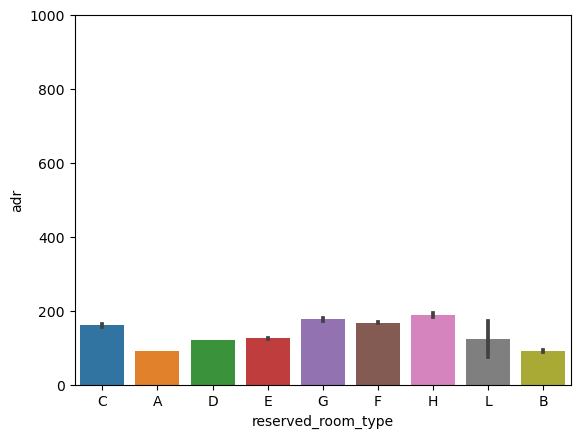

In [87]:
gfg7=sns.barplot(x='reserved_room_type',y='adr',data=datar)
gfg7.set_ylim(0,1000)

In [89]:
datar=datar.join(pd.get_dummies(datar.reserved_room_type))
datar=datar.drop('reserved_room_type',axis=1)

In [90]:
datar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  int64  
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_week_number        119210 non-null  int64  
 4   arrival_date_day_of_month       119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119210 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [95]:
lr.fit(x_train,y_train)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
data_predict=lr.predict(x_test)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
print("The accuracy of the model is ",accuracy_score(y_test,data_predict))

The accuracy of the model is  0.7865531415149736
